In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(style = 'whitegrid')
pd.set_option('display.max_column', None)

In [6]:
df = pd.read_csv('Diabetes_Cleaned.csv')

In [7]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,preceding_year_visits,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),Not Available,Not Available,Referral,1,Pediatrics-Endocrinology,41,0,1,0,Diabetes,Not Required,Not Required,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency,3,NaN,59,0,18,0,"Endocrine, Nutritional, Metabolic, Immunity",Diabetes,"Endocrine, Nutritional, Metabolic, Immunity",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency,2,NaN,11,5,13,3,"Pregnancy, Childbirth",Diabetes,External causes of injury,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency,2,NaN,44,1,16,0,Infectious and Parasitic,Diabetes,Circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency,1,NaN,51,0,8,0,Neoplasms,Neoplasms,Diabetes,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
df.isna().sum()

race                         2239
gender                          3
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           49114
num_lab_procedures              0
num_procedures                  0
num_medications                 0
preceding_year_visits           0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose      

In [9]:
df['gender'].value_counts()

Female    53851
Male      46239
Name: gender, dtype: int64

In [11]:
df[df['gender'].isnull()]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,preceding_year_visits,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
30037,Other,NaN,[70-80),Elective,Discharged to home,Referral,1,Cardiology,5,5,22,0,Circulatory,Circulatory,Circulatory,4,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO
74253,NaN,NaN,[60-70),Emergency,Discharged to home,Emergency,1,NaN,38,1,6,0,Injury and Poisoning,Injury and Poisoning,External causes of injury,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
81170,NaN,NaN,[70-80),Emergency,Transferred to another medical facility,Emergency,8,NaN,59,2,21,0,Injury and Poisoning,Injury and Poisoning,Injury and Poisoning,9,None,None,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO


In [15]:
df = df[df['gender'].notnull()]

In [16]:
df['gender'].isna().sum()

0

In [17]:
df.shape

(100090, 42)

In [21]:
df['race'].value_counts()

Caucasian          74833
AfricanAmerican    18884
Hispanic            2021
Other               1485
Asian                630
Name: race, dtype: int64

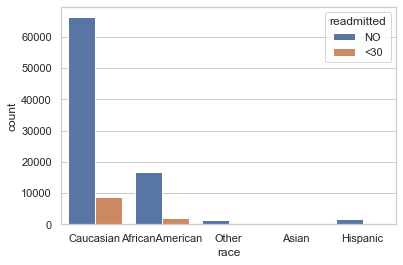

In [20]:
sns.countplot('race', hue = 'readmitted', data = df)

In [30]:
vc = df['race'].value_counts(normalize = True)
miss = df['race'].isna()
df.loc[miss, 'race'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)

C:\Users\Saurabh Tayal\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
df['race'].value_counts()

Caucasian          76543
AfricanAmerican    19293
Hispanic            2066
Other               1519
Asian                649
Name: race, dtype: int64

In [32]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'preceding_year_visits', 'diag_1', 'diag_2',
       'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [33]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 
        'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
        'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [38]:
x = []
for i in meds:
    if df[i].value_counts(1)[0] >= 0.99:
        x.append(i)
x

['nateglinide',
 'chlorpropamide',
 'acetohexamide',
 'tolbutamide',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

In [43]:
len(x)

13

In [41]:
insig = []
sig = []
for i in ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']:
    tab = pd.crosstab(df[i], df['readmitted'])
    a, b, c, d = stats.chi2_contingency(tab)
    print(i)
    print(b, end = '\n\n')
    if (b > 0.05):
        insig.append(i)
    else:
        sig.append(i)
print(insig)
print(len(insig))
print(sig)
print(len(sig))

metformin
6.101897868710476e-15

repaglinide
0.009774181185394528

nateglinide
0.6952463554803546

chlorpropamide
0.4405021277366218

glimepiride
0.051624328120631745

acetohexamide
0.2228394430891339

glipizide
0.012463949196920952

glyburide
0.10499899704024448

tolbutamide
0.5438367201238679

pioglitazone
0.056094558826844824

rosiglitazone
0.08110343576005892

acarbose
0.20788580403670912

miglitol
0.16627910074423832

troglitazone
0.7712261906046636

tolazamide
0.7492123707059324

insulin
3.59886057992474e-42

glyburide-metformin
0.7539617982957746

glipizide-metformin
0.9822739882842448

glimepiride-pioglitazone
0.2228394430891339

metformin-rosiglitazone
0.5424928638832103

metformin-pioglitazone
0.2228394430891339

['nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-r

In [44]:
df = df.drop(x, axis = 1)

In [45]:
df.shape

(100070, 29)

In [46]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,preceding_year_visits,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),Not Available,Not Available,Referral,1,Pediatrics-Endocrinology,41,0,1,0,Diabetes,Not Required,Not Required,1,None,None,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency,3,NaN,59,0,18,0,"Endocrine, Nutritional, Metabolic, Immunity",Diabetes,"Endocrine, Nutritional, Metabolic, Immunity",9,None,None,No,No,No,No,No,No,No,Up,Ch,Yes,NO
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency,2,NaN,11,5,13,3,"Pregnancy, Childbirth",Diabetes,External causes of injury,6,None,None,No,No,No,Steady,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency,2,NaN,44,1,16,0,Infectious and Parasitic,Diabetes,Circulatory,7,None,None,No,No,No,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency,1,NaN,51,0,8,0,Neoplasms,Neoplasms,Diabetes,5,None,None,No,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [47]:
df.drop('medical_specialty', 1, inplace = True)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,preceding_year_visits,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),Not Available,Not Available,Referral,1,41,0,1,0,Diabetes,Not Required,Not Required,1,None,None,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency,3,59,0,18,0,"Endocrine, Nutritional, Metabolic, Immunity",Diabetes,"Endocrine, Nutritional, Metabolic, Immunity",9,None,None,No,No,No,No,No,No,No,Up,Ch,Yes,NO
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency,2,11,5,13,3,"Pregnancy, Childbirth",Diabetes,External causes of injury,6,None,None,No,No,No,Steady,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency,2,44,1,16,0,Infectious and Parasitic,Diabetes,Circulatory,7,None,None,No,No,No,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency,1,51,0,8,0,Neoplasms,Neoplasms,Diabetes,5,None,None,No,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [66]:
df.to_csv('Diabetes_Clean2.csv', index = False)

In [48]:
df['A1Cresult'].value_counts()

None    83200
>8       8148
Norm     4940
>7       3782
Name: A1Cresult, dtype: int64

In [50]:
df['max_glu_serum'].value_counts()

None    94852
Norm     2570
>200     1437
>300     1211
Name: max_glu_serum, dtype: int64

In [54]:
X = df.drop('readmitted', 1)
y = df['readmitted']

In [55]:
X_dum = pd.get_dummies(X, drop_first = True)

In [56]:
X_dum.shape

(100070, 120)

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf = RandomForestClassifier(random_state = 1)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size = 0.3,
                                                   random_state = 1, stratify = df['readmitted'])
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [62]:
rf.score(X_train, y_train)

0.9999571728361576

In [61]:
rf.score(X_test, y_test)

0.8867126344891909

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
pred = rf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         <30       0.61      0.00      0.01      3405
          NO       0.89      1.00      0.94     26616

    accuracy                           0.89     30021
   macro avg       0.75      0.50      0.47     30021
weighted avg       0.86      0.89      0.83     30021

